In [1]:
import os
os.chdir('..')

import numpy as np
import json
from systems import CARModel
from lightning_module import PreTrainLightning
from models import TSMVAE
import torch

from inference_utils import load_pretrained_model

In [2]:
model = load_pretrained_model(
    model_class=TSMVAE,
    lightning_class=PreTrainLightning,
    checkpoint_substr="TSMVAE",
    folder_name='/home/jp4474/viaABC/notebooks_bcell',)

Successfully loaded model


In [3]:
car_abc = CARModel(model=model)

INFO:viaABC:Initializing ViaABC class
INFO:viaABC:Model updated
INFO:viaABC:viaABC class initialized with the following parameters:
INFO:viaABC:num_parameters: 6
INFO:viaABC:Mu: [0.01 0.01 0.01 0.8  0.1  0.01]
INFO:viaABC:Sigma: [0.5 0.5 0.5 0.3 0.3 0.5]
INFO:viaABC:t0: 4
INFO:viaABC:tmax: 30
INFO:viaABC:time_space: [ 4  7  9 14 17 22 26 30]
INFO:viaABC:pooling_method: no_cls
INFO:viaABC:metric: pairwise_cosine


In [4]:
scaled_observational_data = car_abc.preprocess(car_abc.observational_data)

In [5]:
with torch.no_grad():
    pred = model.model(torch.from_numpy(scaled_observational_data).float().unsqueeze(0).to(model.device), mask_ratio = 0.0)[-1].squeeze(0).cpu().numpy()

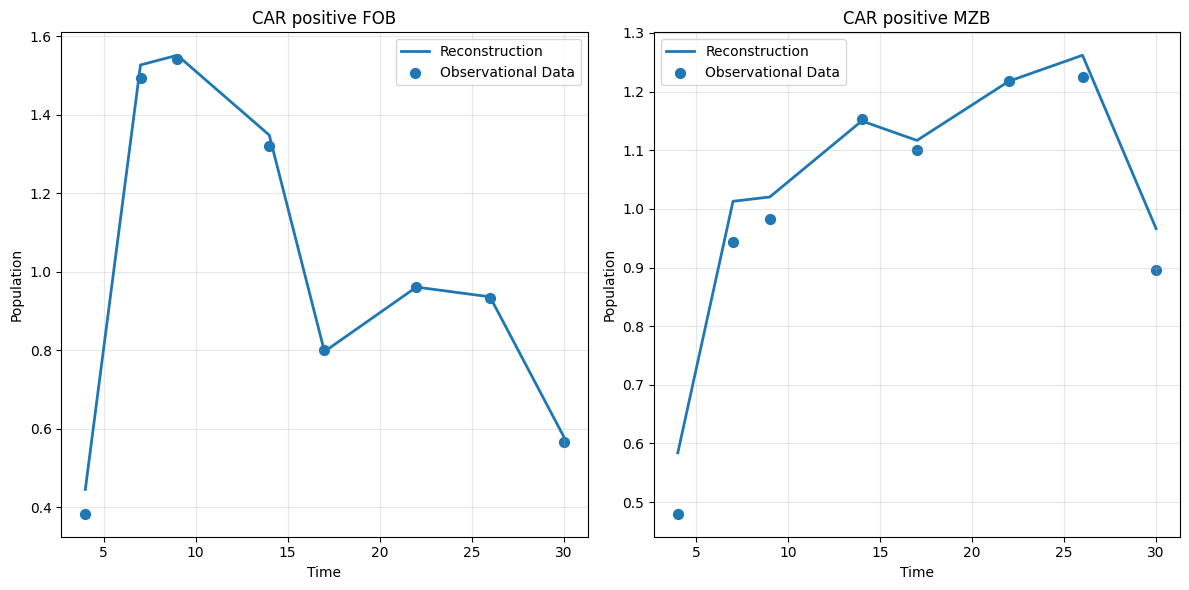

In [6]:
# plot pred as lines, observational_data as points
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot both species (variables) separately
plt.subplot(1, 2, 1)
plt.plot(car_abc.time_space, pred[:, 0], label='Reconstruction', linewidth=2)
plt.scatter(car_abc.time_space, scaled_observational_data[:, 0], label='Observational Data', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('CAR positive FOB')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(car_abc.time_space, pred[:, 1], label='Reconstruction', linewidth=2)
plt.scatter(car_abc.time_space, scaled_observational_data[:, 1], label='Observational Data', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('CAR positive MZB')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
car_abc.run(num_particles=100, k=1, q_threshold=0.99)

INFO:viaABC:Starting ABC PMC run with Q Threshold: 0.99
INFO:viaABC:Initialization (generation 0) started
INFO:viaABC:Initialization completed in 0.19 seconds
INFO:viaABC:Mean: [0.32639224 0.21613709 0.34338966 0.68823268 0.23597563 0.297488  ]
INFO:viaABC:Median: [0.28856671 0.19070642 0.25108003 0.7111842  0.19851938 0.24103166]
INFO:viaABC:Variance: [0.04924058 0.01816963 0.06644784 0.04428309 0.02214909 0.05066275]
INFO:viaABC:Generation 1 started
100%|██████████| 100/100 [00:00<00:00, 161.18it/s]
INFO:viaABC:ABC-SMC: Epsilon : 0.22483
INFO:viaABC:ABC-SMC: Quantile : 0.59170
INFO:viaABC:ABC-SMC: Simulations : 104
INFO:viaABC:Mean: [0.34645283 0.19125101 0.36427797 0.64247748 0.26430073 0.38339903]
INFO:viaABC:Median: [0.33963593 0.19862834 0.38737939 0.52141608 0.27652485 0.36768034]
INFO:viaABC:Variance: [0.05062872 0.01674368 0.06154916 0.05161204 0.03643224 0.08119212]
INFO:viaABC:Generation 1 completed in 0.99 seconds
INFO:viaABC:Generation 2 started
100%|██████████| 100/100 [0

KeyboardInterrupt: 

: 